# 07 Data Answers

Importing libraries.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading files.

In [8]:
data = pd.read_csv('../01_data/clean_data.csv').iloc[:,1:]
#x = pd.read_csv('..\01_data\x.csv')

In [9]:
pd.set_option('display.max_columns', None)
data.head()

,subject_id,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e,atopic_derm_start,atopic_derm_end,allergic_rhinitis_start,allergic_rhinitis_end,asthma_start,asthma_end,first_asthmarx,last_asthmarx,num_asthmarx
0,1,2006,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What is the prevalence of food allergies within birth years?

In [35]:
allerg_year_count = pd.pivot_table(data=data, values=[c for c in data.columns if 'start' in c][1:-3], index='birth_year', aggfunc='count')
allerg_year_count

,egg_start,fish_start,milk_start,nut_start,peanut_start,sesame_start,shellfish_start,soy_start,wheat_start
birth_year,,,,,,,,,
1983,1,2,1,0,0,0,0,0,0
1984,1,2,1,0,0,0,2,0,0
1985,2,6,3,1,5,0,10,1,0
1986,1,5,3,1,8,0,24,1,1
1987,5,13,8,1,15,0,29,3,5
1988,10,18,17,3,43,0,60,2,3
1989,21,29,33,8,45,1,94,14,7
1990,23,32,51,10,55,2,118,21,11
1991,32,50,55,9,92,1,167,11,7


In [92]:
allerg_count = allerg_year_count.sum(axis=0)
allerg_count

egg_start          6064
fish_start         1796
milk_start         7289
nut_start          1845
peanut_start       8652
sesame_start        766
shellfish_start    5246
soy_start          2419
wheat_start        1145
dtype: int64

In [85]:
allerg_year = allerg_year_count.divide(allerg_count, axis=1)*100
allerg_year.columns = [c.split('_')[0] for c in allerg_year.columns]

In [86]:
allerg_year

,egg,fish,milk,nut,peanut,sesame,shellfish,soy,wheat
birth_year,,,,,,,,,
1983,0.016491,0.111359,0.013719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.016491,0.111359,0.013719,0.000000,0.000000,0.000000,0.038124,0.000000,0.000000
1985,0.032982,0.334076,0.041158,0.054201,0.057790,0.000000,0.190621,0.041339,0.000000
1986,0.016491,0.278396,0.041158,0.054201,0.092464,0.000000,0.457491,0.041339,0.087336
1987,0.082454,0.723831,0.109754,0.054201,0.173370,0.000000,0.552802,0.124018,0.436681
1988,0.164908,1.002227,0.233228,0.162602,0.496995,0.000000,1.143729,0.082679,0.262009
1989,0.346306,1.614699,0.452737,0.433604,0.520111,0.130548,1.791841,0.578752,0.611354
1990,0.379288,1.781737,0.699684,0.542005,0.635691,0.261097,2.249333,0.868127,0.960699
1991,0.527704,2.783964,0.754562,0.487805,1.063338,0.130548,3.183378,0.454733,0.611354


<AxesSubplot: xlabel='birth_year'>

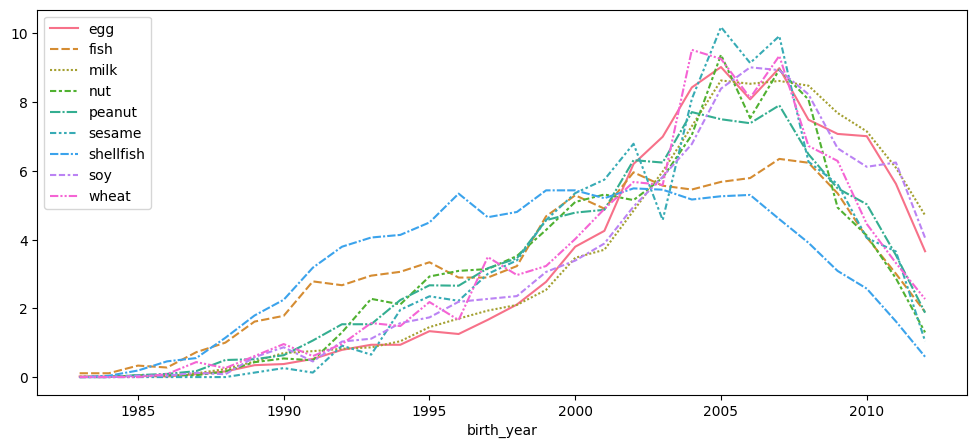

In [89]:
fig,ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=allerg_year, palette='husl')

## What is the most common food allergy per birth year?

In [109]:
year_count = pd.pivot_table(data=data, values='subject_id', index='birth_year', aggfunc='count')
year_count = list(year_count.iloc[:,0])

In [112]:
allerg_y = allerg_year_count.divide(year_count, axis=0)*100
allerg_y.columns = [c.split('_')[0] for c in allerg_y.columns]

In [114]:
allerg_y

,egg,fish,milk,nut,peanut,sesame,shellfish,soy,wheat
birth_year,,,,,,,,,
1983,11.111111,22.222222,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.793651,1.587302,0.793651,0.000000,0.000000,0.000000,1.587302,0.000000,0.000000
1985,0.420168,1.260504,0.630252,0.210084,1.050420,0.000000,2.100840,0.210084,0.000000
1986,0.081900,0.409500,0.245700,0.081900,0.655201,0.000000,1.965602,0.081900,0.081900
1987,0.195312,0.507812,0.312500,0.039062,0.585938,0.000000,1.132812,0.117188,0.195312
1988,0.225276,0.405497,0.382969,0.067583,0.968687,0.000000,1.351656,0.045055,0.067583
1989,0.338164,0.466989,0.531401,0.128824,0.724638,0.016103,1.513688,0.225443,0.112721
1990,0.305973,0.425702,0.678462,0.133032,0.731675,0.026606,1.569775,0.279367,0.146335
1991,0.373439,0.583499,0.641849,0.105030,1.073638,0.011670,1.948886,0.128370,0.081690


Text(0, 0.5, 'Percentage of diagnosis per birth year (others)')

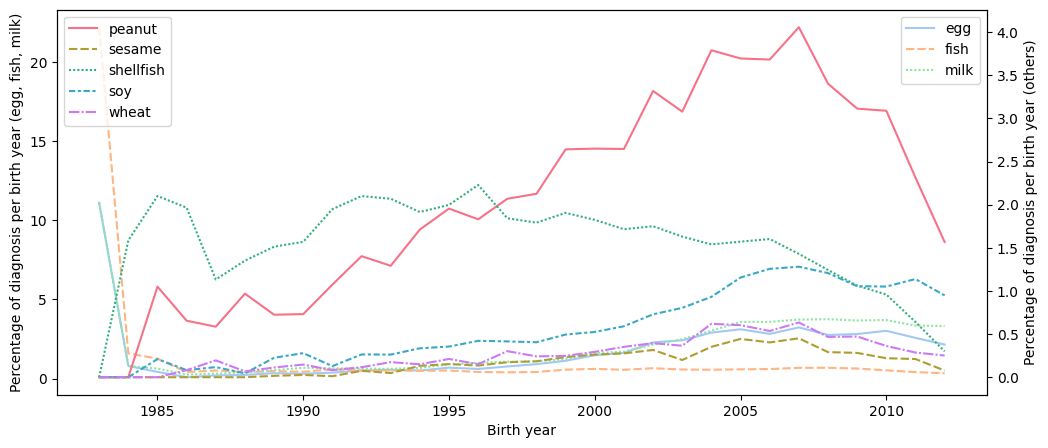

In [130]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2= ax1.twinx()
sns.lineplot(data=allerg_y.iloc[:,4:], palette='husl', ax=ax2)
sns.lineplot(data=allerg_y.iloc[:,0:3], palette='pastel', ax=ax1)
ax1.set_ylabel('Percentage of diagnosis per birth year (egg, fish, milk)')
ax1.set_xlabel('Birth year')
ax2.set_ylabel('Percentage of diagnosis per birth year (others)')

## What is the prevalence of eczema, asthma, and rhinitis through age?

## What food allergies are more related with developing a dermatological/respiratory allergy?

In [ ]:
xy = pd.concat([data.iloc[:,-9:],x_sc], axis=1)

In [ ]:
data.drop(['subject_id','birth_year','age_start_years','age_end_years','nut_c_s','nut_c_e'], axis=1).corr()[['atopic_derm_start','atopic_derm_end','allergic_rhinitis_start','allergic_rhinitis_end','asthma_start','asthma_end']]

In [ ]:
fig,ax = plt.subplots(figsize=(5,15))
sns.heatmap(xy_corr, annot=True, annot_kws={"size": 35 / np.sqrt(len(xy_corr))})

In [ ]:
xy = pd.concat([data.iloc[:,-9:],x_sc], axis=1)
xy_corr = xy.corr()[['atopic_derm_start', 'atopic_derm_end', 'allergic_rhinitis_start',
       'allergic_rhinitis_end', 'asthma_start', 'asthma_end', 'first_asthmarx',
       'last_asthmarx', 'num_asthmarx']]